In [1]:
import sys
sys.path.append('../')
from proto_files.player import Player

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# game_date = "2019-08-13"
# proto_player = Player().parse(open(f"./../data/{str(115509)}.pb", "rb").read())

# df = pd.DataFrame(proto_player.starter.x_i)
# df.sort_values('game_date', inplace=True)
# print(df.shape)
# display(df.tail())
# df = df[df['game_date'] < game_date]
# print(df.shape)
# display(df.tail())
# display(df.iloc[-5:])

In [3]:
# data = pd.read_csv("train_data_sum_new_last_5.csv", sep=";")
# data.head()
# data = pd.read_csv("train_data_new_no_minute.csv", sep=";")
# data.head()
data = pd.read_csv("data_0.2/data_game_values_train.csv", sep=";")
data.head(20)

,game_id,table_pos_home,table_pos_away,ha_table_pos_home,ha_table_pos_away,form_home,form_away,ha_form_home,ha_form_away,elo_home,...,away_sub_xT_only_pos,away_sub_xD_press,away_sub_xD_normal,away_sub_xK,away_sub_gi,away_sub_xg_against,away_sub_xt_all_against,away_sub_xt_only_pos_against,home_score,away_score
0,1202302.0,11,14,15,14,10,6,5,4,1420.369995,...,0.164364,0.056052,0.248281,0.0,-0.204545,0.362029,0.241589,0.359532,4,0
1,1202234.0,16,3,14,8,10,11,10,7,1387.706299,...,0.315165,0.084685,0.277715,0.0,-1.363636,0.271525,0.290961,0.367640,4,3
2,1202358.0,10,7,9,4,10,3,10,7,1472.524902,...,0.111561,0.068067,0.295578,0.0,-0.227273,0.212592,0.220366,0.418844,3,2
3,1202366.0,6,14,7,15,13,7,12,5,1451.049316,...,0.140146,0.081267,0.194657,0.0,0.012573,0.177100,0.177030,0.240287,2,1
4,1202162.0,9,6,6,8,8,11,8,5,1525.186035,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,1
5,1202315.0,15,18,18,17,5,5,6,4,1410.106323,...,0.364079,0.076952,0.304848,0.0,-1.033032,0.512035,0.158753,0.324622,1,2
6,1202255.0,14,10,17,7,5,13,7,10,1425.218628,...,0.146427,0.072086,0.487287,0.0,0.056003,0.178094,0.258437,0.348696,2,2
7,1202309.0,5,17,10,18,9,9,10,3,1520.913574,...,0.111329,0.037516,0.102129,0.0,0.000000,0.024527,0.050089,0.067254,3,0
8,1202406.0,9,17,10,13,9,4,9,7,1439.704834,...,0.399751,0.082761,0.256624,0.0,0.082156,0.231687,0.270020,0.364679,2,0
9,1202193.0,13,11,17,5,7,7,4,7,1552.125244,...,0.235204,0.038871,0.163052,0.0,-0.016453,0.366146,0.267509,0.334013,2,2


<BarContainer object of 9 artists>

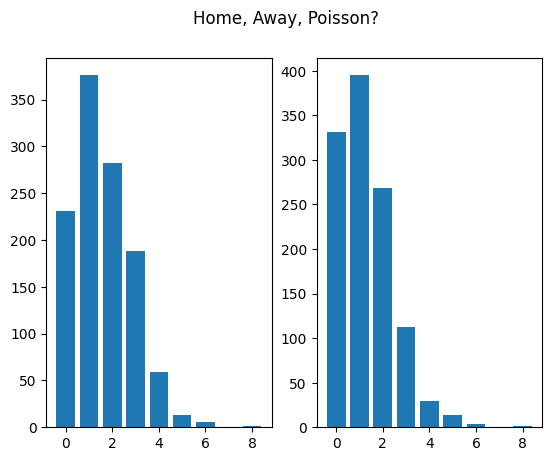

In [4]:
his_h, _ = np.histogram(data.home_score, [0,1,2,3,4,5,6,7,8,9])
his_a, _ = np.histogram(data.away_score, [0,1,2,3,4,5,6,7,8,9])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Home, Away, Poisson?')
ax1.bar(np.arange(len(his_h)),his_h)
ax2.bar(np.arange(len(his_a)),his_a)

In [ ]:
data_new = pd.DataFrame({"winner": [1 if data.home_score.iloc[x] > data.away_score.iloc[x] else 0 if data.home_score.iloc[x] == data.away_score.iloc[x] else -1 for x in range(data.shape[0])]})

In [ ]:
data_new["home_score"] = data["home_score"]
data_new["away_score"] = data["away_score"]

data_new["score_diff"] = data["home_score"] - data["away_score"]
data_new["home_xG"] = data["home_xG"]
data_new["home_xG_all"] = data["home_xG"] + data["home_sub_xG"]
data_new["home_xT"] = data["home_xT"]
data_new["home_xT_all"] = data["home_xT"] + data["home_sub_xT"]
data_new["home_xD"] = data["home_xD"]
data_new["home_xD_all"] = data["home_xD"] + data["home_sub_xD"]
data_new["home_xK"] = data["home_xK"]
data_new["home_xK_all"] = data["home_xK"] + data["home_sub_xK"]
data_new["home_all_att"] = data_new["home_xG_all"] + data_new["home_xT_all"]
data_new["home_all_def"] = data_new["home_xD_all"] + data_new["home_xK_all"]

data_new["away_xG"] = data["away_xG"]
data_new["away_xG_all"] = data["away_xG"] + data["away_sub_xG"]
data_new["away_xT"] = data["away_xT"]
data_new["away_xT_all"] = data["away_xT"] + data["away_sub_xT"]
data_new["away_xD"] = data["away_xD"]
data_new["away_xD_all"] = data["away_xD"] + data["away_sub_xD"]
data_new["away_xK"] = data["away_xK"]
data_new["away_xK_all"] = data["away_xK"] + data["away_sub_xK"]
data_new["away_all_att"] = data_new["away_xG_all"] + data_new["away_xT_all"]
data_new["away_all_def"] = data_new["away_xD_all"] + data_new["away_xK_all"]

data_new["xK_diff"] = data["home_xK"] - data["away_xK"]
data_new["xD_diff"] = data["home_xD"] - data["away_xD"]
data_new["xT_diff"] = data["home_xT"] - data["away_xT"]
data_new["xG_diff"] = data["home_xG"] - data["away_xG"]
data_new["xK_diff_all"] = data_new["home_xK_all"] - data_new["away_xK_all"]
data_new["xD_diff_all"] = data_new["home_xD_all"] - data_new["away_xD_all"]
data_new["xT_diff_all"] = data_new["home_xT_all"] - data_new["away_xT_all"]
data_new["xG_diff_all"] = data_new["home_xG_all"] - data_new["away_xG_all"]
data_new["diff_all_att"] = data_new["home_all_att"] - data_new["away_all_att"]
data_new["diff_att_def"] = data_new["home_all_att"] - data_new["away_all_def"]
data_new["diff_def_att"] = data_new["home_all_def"] - data_new["away_all_att"]
data_new["diff_all"] = data_new["home_all_att"] + data_new["home_all_def"] - data_new["away_all_att"] - data_new["away_all_def"]


data_new.head()

In [ ]:
data_new.corr()[["winner", "home_score", "away_score", "score_diff"]].style.applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)